# Assignment 1: Face-Classification Two-Ways

In this assignment you will implement a face classifier and train it using two different approaches:
* Regression using Gradient Descent
* Gaussian Discriminant Analysis

## Setup
Before running the code please make sure that you have all the necessary packages installed. Make sure that you have installed "scikit-image" package. 
First import the required packages and do some setup:

In [1]:
from __future__ import print_function

import sys 
sys.path.append('./assignment1_solutions')

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from assignment1_solutions import hog_features, tanh, gda, cost_function, gradient_function, tanh_GD, predict_function

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Now load the data set. It consists of 19'832 grayscale images of size 24 x 24. Each image has a corresponding label which we set to -1 for non-face and 1 for face.

In [2]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
data = data['Data']

We divide the dataset into two subsets: One for training and one for testing. This approach is called cross-validation and is standard practice in Machine Learning.
The classifier will be learnt only on the data in the training set! The test set then gives you an estimate of how well the classifier will perform on new unseen data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


Notice that the images are stored as vectors now. Let's visualize some examples to check that the data is fine. We of course have to reshape the images first:

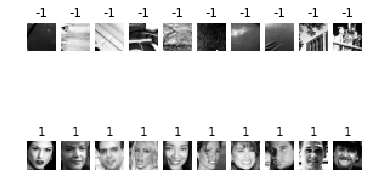

In [4]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [-1, 1]
train_imgs = np.reshape(X_train, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(y_train, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(train_imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Finally, we add the intercept term by concatenating a vector of ones to the train and test data:

In [5]:
# Add intercept to X and normalize to range [0, 1]
X_train = np.concatenate((np.ones((num_train, 1)), X_train/255.), axis=1)
X_test = np.concatenate((np.ones((num_test, 1)), X_test/255.), axis=1)

## Exercise 1: Tanh [5 Points]

**TODO**: Implement the tanh function in ***assignment1/tanh.py*** according to the specifications. $tanh(x) = \frac{e^{2x}-1}{e^{2x}+1}$<br>
**NOTE**: The function should work with inputs of arbitrary shape!

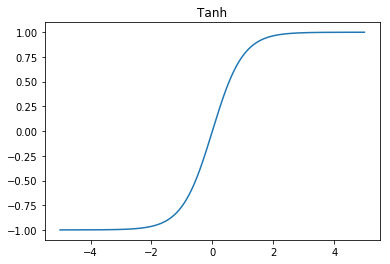

In [6]:
# Test your Tanh
z_test = np.arange(-5, 5, 0.01)
g_test = tanh(z_test)
plt.plot(z_test, g_test)
plt.title('Tanh')
plt.show()

## Exercise 2: Cost Function [10 Points]

**TODO**: Implement the cost function for Regression in ***assignment1/cost_function.py*** according to specs. $\mathcal{L}(\theta)=\frac{1}{m}\sum_{i=1}^{m}(tanh(\theta^{T}x_{i})-y_{i})^{2}$<br>
What value of the cost do you expect with a parameter vector *theta* of all zeros? Check your implementation for this!

**Hint**: No for-loops are required! Use np.sum and np.dot instead...

In [7]:
# Test your cost-function
theta_0 = np.zeros(X_train.shape[1])
l_0 = cost_function(theta_0, X_train, y_train)
print('Cost with initial theta: ', l_0)

Cost with initial theta:  1.0


## Exercise 3: The Gradient [10 Points]

**TODO**: Compute and implement the gradient of the cost function in ***assignment1/gradient_function.py***. 

**NOTE**: Your implementation should work with a single example x (i.e., a vector) or multiple examples X (i.e., a matrix).

Consider again what value you would expect with *theta* equal to zero and test your implementation:


In [8]:
# Test your implementation
x_test = np.ones([2, 10])
theta_0 = np.zeros(10)
grad_0 = gradient_function(theta_0, x_test, 1.0)
print(grad_0)

[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]


# Exercise 4: The Learning Algorithmms

This is the main part of the assignment. Correctness of the implementation is required to get the points (work on speed later). 

## a) Regression with GD [15 Points]

**TODO**: Implement the function in ***assignment1/tanh_GD.py*** according to specs.

## b) Gaussian Discriminant Analysis [15 Points]

**TODO**: Implement the function in ***assignment1/gda.py*** according to specs.



***Hint***: No additional for-loops are required!

Iter 0/10000: cost = 0.9615466987876171  (0.01400446891784668s)
Iter 1000/10000: cost = 0.2842050830616643  (0.0040018558502197266s)
Iter 2000/10000: cost = 0.2537797468881731  (0.009994983673095703s)
Iter 3000/10000: cost = 0.2411420402261464  (0.0030007362365722656s)
Iter 4000/10000: cost = 0.2340425551130917  (0.00699925422668457s)
Iter 5000/10000: cost = 0.22944076777710942  (0.002733945846557617s)
Iter 6000/10000: cost = 0.2261989974366954  (0.005995750427246094s)
Iter 7000/10000: cost = 0.22378812568994005  (0.003995418548583984s)
Iter 8000/10000: cost = 0.2219259725523164  (0.004998207092285156s)
Iter 9000/10000: cost = 0.22044711901711472  (0.003000020980834961s)
Total exection time: 44.66592526435852s


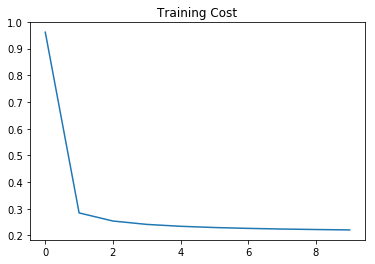

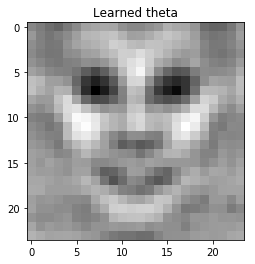

In [9]:
method = 'gd'

# We'll meausure the execution time
start = time.time()

if method is 'gd':
    theta, losses = tanh_GD(X_train, y_train)
elif method is 'gda':
    theta, losses = gda(X_train, y_train)
else:
    raise ValueError('Method not recognised!')

exec_time = time.time()-start
print('Total exection time: {}s'.format(exec_time))

if losses:
    plt.plot(losses)
    plt.title('Training Cost')
    plt.show()

# We can have a look at what theta has learned to recognise as "face"
plt.imshow(np.reshape(theta[1:], [24, 24], order='F'))
plt.title('Learned theta')
plt.show()

### Exercise 6: Testing the Classifier [10 Points]

**TODO**: Implement ***assignment1/predict_function.py*** according to specs. 

Test your implementation with the intial all zero theta as well! Does it match your expectation?

***Hint***: All the methods should score above 90% on both the test and train set!

In [10]:
# Test the final classifier
pred_test, accuracy_test = predict_function(theta, X_test, y_test)
pred_train, accuracy_train = predict_function(theta, X_train, y_train)
print('Test accuracy: {}'.format(accuracy_test))
print('Training accuracy: {}'.format(accuracy_train))

Test accuracy: 0.9250420168067227
Training accuracy: 0.9310618066561015


### Exercise 7: Preprocessing [15 Points]

**TODO**: Implement ***assignment1/features.py*** according to specs.

Up to this point we trained our classifiers dirrectly on image pixel intensities. 
In this exercise you should extract HOG features from the training and test images and train on the extracted features. Make sure that you reshape the extracted HOG features before you start training. 
For HOG feature extractor you can have a look at http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py. For documentation please have a look at http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog. Make sure that you tune the parameters of the HOG feature extractor to get the best performance.

HOG feature extraction can take several minutes at most on your PC.

In [11]:
# Extract HOG features
X_train_hog = hog_features(X_train)
X_test_hog = hog_features(X_test)


Lets train on HOG features and measure the testing accuracy.

Training gd
Iter 0/10000: cost = 0.9764832979505843  (0.0060045719146728516s)
Iter 1000/10000: cost = 0.15402532734089935  (0.003988981246948242s)
Iter 2000/10000: cost = 0.12969048532379168  (0.0019578933715820312s)
Iter 3000/10000: cost = 0.11929204246625526  (0.002115011215209961s)
Iter 4000/10000: cost = 0.11323055670203312  (0.003003835678100586s)
Iter 5000/10000: cost = 0.1091841746359351  (0.001993894577026367s)
Iter 6000/10000: cost = 0.10626851577665287  (0.0019969940185546875s)
Iter 7000/10000: cost = 0.10406211819190286  (0.001977682113647461s)
Iter 8000/10000: cost = 0.10233469940133787  (0.0019986629486083984s)
Iter 9000/10000: cost = 0.1009481914774071  (0.002003908157348633s)
Total exection time for gd: 27.393604278564453s


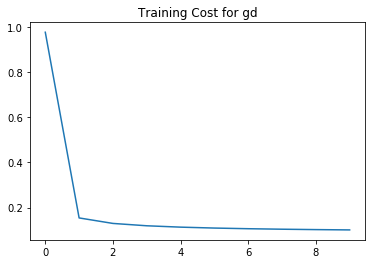

Test accuracy for gd: 0.9692436974789916
Training accuracy for gd: 0.9712577438409452



Training gda
(1,) (324,)
Iter 1/1: cost = 0.08670356274520953  (0.2229917049407959s)
Total exection time for gda: 0.2529888153076172s
Test accuracy for gda: 0.9714285714285714
Training accuracy for gda: 0.9747154588675984





In [12]:
# We'll meausure the execution time
methods = ['gd','gda']

for method in methods:
    print('Training ' + method)
    # We'll meausure the execution time
    start = time.time()

    if method is 'gd':
        theta, losses = tanh_GD(X_train_hog, y_train)
    elif method is 'gda':
        theta, losses = gda(X_train_hog, y_train)
    else:
        raise ValueError('Method not recognised!')

    exec_time = time.time()-start
    print('Total exection time for ' + method + ': {}s'.format(exec_time))

    if losses:
        plt.plot(losses)
        plt.title('Training Cost for ' + method)
        plt.show()

    pred_test, accuracy_test = predict_function(theta, X_test_hog, y_test)
    pred_train, accuracy_train = predict_function(theta, X_train_hog, y_train)
    print(str('Test accuracy for ' + method + ': '+'{}').format(accuracy_test))
    print(str('Training accuracy for ' + method + ': '+'{}\n\n\n').format(accuracy_train))

### Exercise 8: Discussion [20 Points]

Answer the following questions and justify your answers:

* Based on your results, which classifier do you prefer and why?

	***Your Answer:***
    The Test accuracy for GD is approximately 92.5%, where for the GDA, it is 91.6% in the run without features. No significant difference is noticeable from the results. For performance reasons, the GDA approach is fast because the algorithm has no iterations. With the preprocessed method, the test results are even higher, with the GD test accuracy of 97.0% and GDA of 97.1%. Also, the results with the preprocessed images are quite similar and behave like the non-feature approach. Based on the results, we would choose the GDA classifier as one can get similar results with almost the same quality as in GD. Increasing the increments in GD does not lead necessarily to better results, as the convergence is quite stable in later iterations.
    
    
* Regression vs. GDA: Give advantages and disadvantages of both approaches. How would you expect the results to change if more or less data were used during training?

	***Your Answer:***
    In most cases, the data comes with a gaussian distribution. So it is good to use the GDA approach. Data with Gaussian distributed data speaks for GDA. However, when this is not the case, the GDA can not be used because it makes strong assumptions on the data, and this is a disadvantage. Where GDA is much faster, GD can handle data that is not Gaussian distributed. GD is useful when we have weak assumptions. Also, with a large amount of data, where the assumptions are not easy to make. To sum up, GDA for Gaussian distributed data and GD for data with weak assumptions is the way to go.
    
    
* Pixel Values VS HOG Features: Based on your results, did HOG features improve the performence of the classifier?

   ***Your Answer:***
   HOG features are giving us more information than the pixel values. The HOG approach catches more features of a face itself. Instead of the values of pixels, the gradients show the characteristics of the face, leading the better features.
   

### Bonus: Make it fast! [10 Points]

Optimise your implementations by making good use of Numpy. If your implementation of one of the methods is within a factor of two of the reference implementation you'll earn 5 additional points (a total of 15 points possible for the two methods).